# Algoritmos de optimización - Trabajo Práctico<br>
Nombre y Apellidos: Paul Florencio Rojas Quispe  <br>
Url: https://github.com/paul0610/03MIAR---Algoritmos-de-Optimizacion---2023/tree/main/TrabajoPractico<br>
Google Colab: https://colab.research.google.com/drive/1mUiXex8PIayhUvM2pEF2upKCtYLd9zg2?usp=sharing <br>
Problema:
>1. Sesiones de doblaje <br>
>2. Organizar los horarios de partidos de La Liga<br>
>3. Configuración de Tribunales

Descripción del problema:(copiar enunciado)

## Problema 1. Organizar sesiones de doblaje(I)
• Se precisa coordinar el doblaje de una película. Los actores del doblaje deben coincidir en las
tomas en las que sus personajes aparecen juntos en las diferentes tomas. Los actores de
doblaje cobran todos la misma cantidad por cada día que deben desplazarse hasta el estudio de
grabación independientemente del número de tomas que se graben. No es posible grabar más
de 6 tomas por día. El objetivo es planificar las sesiones por día de manera que el gasto por los
servicios de los actores de doblaje sea el menor posible. Los datos son:
Número de actores: 10
Número de tomas : 30
Actores/Tomas : https://bit.ly/36D8IuK
- 1 indica que el actor participa en la toma
- 0 en caso contrario


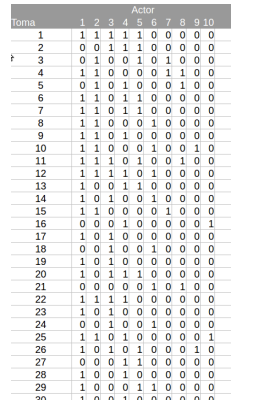






                                        

# SOLUCIÓN PROPUESTA EN PHYTON:

In [28]:
# Primero, vamos a cargar los datos del archivo Excel proporcionado
import pandas as pd
from itertools import combinations
import numpy as np

# Ruta al archivo cargado
data_path = 'Datos problema doblaje(30 tomas, 10 actores).xlsx'

# Cargar los datos desde el archivo Excel
df = pd.read_excel(data_path)

# Imprimir las primeras filas para verificar la estructura de los datos
df.head()

# Ajustar el DataFrame para organizar correctamente los datos en una matriz de actores y tomas
# Eliminamos la primera fila que contiene los nombres de los actores y la última columna "Total"
df_ajustado = df.drop(index=0, columns=["Unnamed: 0", "Unnamed: 11", "Unnamed: 12"])

# Eliminar filas con valores NaN
df_ajustado.dropna(inplace=True)

# Convertir el DataFrame ajustado, ya limpio de valores NaN, a una matriz de numpy de tipo entero
matriz_tomas_actores = df_ajustado.to_numpy(dtype=int)

df_ajustado_sin_totales = df_ajustado.iloc[:-1, :]

# Convertimos el DataFrame ajustado (sin la fila de totales) a una matriz de numpy de tipo entero
matriz_tomas_actores_sin_totales = df_ajustado_sin_totales.to_numpy(dtype=int)

# Simulación de la matriz de participación de actores en tomas
# En un caso real, esta matriz se cargaría y prepararía a partir de los datos del archivo Excel
tomas_actor = matriz_tomas_actores_sin_totales  # 30 tomas, 10 actores

def es_combinacion_valida(combinacion, tomas_actor):
    """Verifica si los actores están disponibles para todas las tomas en la combinación."""
    actores_por_toma = tomas_actor[combinacion, :]
    return np.all(np.sum(actores_por_toma, axis=0) <= 1)

def organizar_tomas(tomas_actor):
    tomas_pendientes = list(range(tomas_actor.shape[0]))
    dias = []

    while tomas_pendientes:
        max_tomas = 0
        mejor_combinacion = None
        for r in range(1, min(6, len(tomas_pendientes)) + 1):
            for combinacion in combinations(tomas_pendientes, r):
                if es_combinacion_valida(combinacion, tomas_actor) and len(combinacion) > max_tomas:
                    max_tomas = len(combinacion)
                    mejor_combinacion = combinacion
        if mejor_combinacion:
            dias.append(mejor_combinacion)
            for toma in mejor_combinacion:
                tomas_pendientes.remove(toma)

    return dias

# Organizar las tomas y calcular el resultado
dias_de_tomas = organizar_tomas(tomas_actor)

# Imprimir el resultado
print(f"Total de días necesarios: {len(dias_de_tomas)}")
for i, dia in enumerate(dias_de_tomas, start=1):
    print(f"Día {i}: Tomas {sorted(dia)}")

Total de días necesarios: 22
Día 1: Tomas [2, 15, 16, 20]
Día 2: Tomas [3, 17, 26]
Día 3: Tomas [1, 7]
Día 4: Tomas [4, 13]
Día 5: Tomas [5, 23]
Día 6: Tomas [0]
Día 7: Tomas [6]
Día 8: Tomas [8]
Día 9: Tomas [9]
Día 10: Tomas [10]
Día 11: Tomas [11]
Día 12: Tomas [12]
Día 13: Tomas [14]
Día 14: Tomas [18]
Día 15: Tomas [19]
Día 16: Tomas [21]
Día 17: Tomas [22]
Día 18: Tomas [24]
Día 19: Tomas [25]
Día 20: Tomas [27]
Día 21: Tomas [28]
Día 22: Tomas [29]


# MODELO

## ¿Como represento el espacio de soluciones?:


- El espacio de soluciones para este problema incluye todas las posibles combinaciones de asignación de tomas a días, de tal manera que se cumplan las restricciones de participación de actores y el límite de tomas por día. Cada solución en este espacio es una manera específica de distribuir las 30 tomas a través de un número de días, con hasta 6 tomas por día. Matemáticamente, podrías pensar en este espacio como el conjunto de todas las particiones posibles de las tomas en grupos de hasta 6, donde cada grupo representa las tomas asignadas a un día particular.




## ¿Cuál es la función objetivo?

- La función objetivo es minimizar el número total de días necesarios para completar todas las tomas. Esto se traduce en encontrar la distribución de tomas por día que cumpla con todas las restricciones mientras se utiliza el menor número posible de días. En términos de optimización, esto podría formularse como:

  ***min Número de Días***

  donde el "Número de Días" es el total de días requeridos para grabar todas las tomas dadas las restricciones.


## ¿Cómo implemento las restricciones?

Las restricciones se implementan de la siguiente manera:

1. Restricción de Participación de Actores: Cada toma requiere la presencia de ciertos actores. Cuando se elige una toma para un día específico, solo se pueden elegir tomas adicionales para ese día si los actores requeridos no entran en conflicto con los ya programados para otras tomas ese día. Esto se verifica sumando las presencias de actores para las tomas seleccionadas y asegurándose de que ningún actor esté contado más de una vez.



In [ ]:
def es_combinacion_valida(combinacion, tomas_actor):
    actores_por_toma = tomas_actor[combinacion, :]
    return np.all(np.sum(actores_por_toma, axis=0) <= 1)


2. Límite de 6 Tomas por Día: No se pueden asignar más de 6 tomas a un solo día. Esto se controla directamente en el algoritmo al limitar el tamaño de las combinaciones de tomas consideradas para cada día a un máximo de 6.

In [ ]:
for r in range(1, min(6, len(tomas_pendientes)) + 1):
    for combinacion in combinations(tomas_pendientes, r):
        if es_combinacion_valida(combinacion, tomas_actor):
            ...


Al aplicar estas restricciones dentro del algoritmo voraz, se garantiza que solo se consideren las soluciones que cumplen con los requisitos del problema. Este enfoque permite una búsqueda eficiente dentro del espacio de soluciones posibles, dirigiéndose hacia una solución que minimiza el número total de días requeridos para el doblaje.

# Análisis
**- ¿Que complejidad tiene el problema?. Orden de complejidad y Contabilizar el espacio de soluciones**

## Complejidad del Problema
La complejidad del problema puede analizarse desde dos perspectivas principales: el espacio de soluciones y el orden de complejidad computacional.


1. Orden de Complejidad Computacional:

  La complejidad computacional del algoritmo voraz propuesto depende principalmente de dos factores: el número de tomas (N) y el número máximo de tomas permitidas por día (M, que es 6 en este caso). En el peor de los casos, el algoritmo intenta todas las combinaciones posibles de tomas para cada día hasta que encuentra una combinación válida, lo que implica explorar combinaciones de hasta 6 tomas de un conjunto de N.
  El número de combinaciones posibles de N tomas tomadas de M en M es dado por la suma de los coeficientes binomiales desde 1 hasta M, lo cual se puede aproximar a $2^{N}$ para valores grandes de N, asumiendo M constante. Esto indica que la complejidad computacional puede acercarse a una complejidad exponencial en términos del número de tomas, especialmente porque para cada combinación, se verifica la validez contra las restricciones de los actores, lo cual agrega su propia complejidad.


2. Espacio de Soluciones:

  El espacio de soluciones del problema incluye todas las posibles maneras de asignar 30 tomas a un número no especificado de días, sin exceder 6 tomas por día y respetando la disponibilidad de los actores. Si ignoramos temporalmente las restricciones de los actores y solo consideramos la limitación de 6 tomas por día, el espacio de soluciones es el número de particiones de un conjunto de 30 tomas donde cada partición puede tener hasta 6 elementos.

  Este espacio es enormemente grande y crece exponencialmente con el número de tomas. Aunque no hay una fórmula cerrada simple para calcular este número exactamente, es evidente que el espacio de soluciones es vasto y complejo, especialmente cuando reintroducimos la restricción adicional de que ciertas tomas no pueden coincidir el mismo día debido a conflictos entre los actores.


### Conclusión
- El problema de organizar sesiones de doblaje bajo las restricciones dadas tiene una complejidad computacional que se aproxima a exponencia $(O(2^{N}))$ debido a la naturaleza combinatoria de buscar combinaciones válidas de tomas. El espacio de soluciones es igualmente vasto, con una cantidad exponencialmente grande de posibles asignaciones de tomas a días, lo cual se complica aún más por las restricciones de disponibilidad de actores. Este análisis subraya la importancia de utilizar heurísticas y algoritmos eficientes para encontrar soluciones prácticas en un tiempo razonable, aunque no se garantice la optimalidad absoluta.

#Diseño
- ¿Que técnica utilizo? ¿Por qué?

La técnica utilizada para abordar el problema de organizar sesiones de doblaje es un algoritmo voraz (greedy algorithm). Esta elección se basa en varias razones clave que hacen que esta técnica sea adecuada para el problema en cuestión:

**1. Simplicidad y Eficiencia:**
- Los algoritmos voraces son conceptualmente simples y pueden ser muy eficientes en términos de tiempo de ejecución para ciertos tipos de problemas. Al tomar decisiones locales óptimas en cada paso, sin reconsiderarlas posteriormente, permiten construir rápidamente una solución al problema sin la necesidad de explorar exhaustivamente todo el espacio de soluciones.

**2. Naturaleza Combinatoria del Problema:**
- Dado que el problema de organizar sesiones de doblaje tiene una naturaleza combinatoria (implicando la selección de tomas para cada día de grabación de manera que se cumplan ciertas restricciones), el uso de un enfoque voraz ofrece un método práctico para reducir el espacio de búsqueda. En lugar de evaluar todas las posibles combinaciones de tomas para cada día, el algoritmo voraz se enfoca en encontrar combinaciones que maximicen el número de tomas por día, dadas las restricciones, lo cual es una aproximación razonable para minimizar el número total de días de grabación.

**3. Restricciones de Disponibilidad de Actores:**
- Las restricciones específicas del problema, como la disponibilidad de los actores para las tomas, hacen que el problema sea más complejo que una simple partición de tomas en días. El enfoque voraz permite integrar estas restricciones de manera directa al evaluar si una toma puede ser asignada a un día específico, facilitando el manejo de restricciones complejas sin necesidad de algoritmos de optimización más complicados.

**4. Compromiso entre Optimalidad y Factibilidad:**
- Aunque los algoritmos voraces no garantizan encontrar la solución óptima global para todos los problemas, son especialmente útiles cuando se busca un compromiso entre la calidad de la solución y la factibilidad computacional. Para problemas con un espacio de soluciones vasto y complejo, como el presente, ofrecen una forma viable de obtener soluciones buenas en un tiempo razonable, lo cual es preferible en situaciones donde la ejecución de algoritmos más exhaustivos sería prohibitivamente costosa o lenta.



## Conclusión
- En resumen, la elección de un algoritmo voraz para este problema se justifica por su capacidad para proporcionar soluciones eficientes y prácticas dentro de las limitaciones computacionales, mientras se manejan las restricciones específicas del problema de manera efectiva, haciendo un balance entre la simplicidad del algoritmo y la complejidad del problema a resolver.
